<a href="https://colab.research.google.com/github/alanchow85/AIUP2/blob/main/Lab02b_Phishing_Prediction_Answer(AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Colab notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.


# Phishing Prediction Exercise using K-Nearest Neighbour (Answer)
In this lab, we will be working with a Phishing Dataset to train a K-Nearest Neighbour (KNN).

There are some parts that requires your input and some blanks indicated with **None** for you to fill in.

This lab is very similiar to the Malware Prediction, except that we are using a different dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Read the csv file

In [2]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day1-am/phishing_dataset.csv

--2023-06-16 05:33:20--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day1-am/phishing_dataset.csv
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.41.15
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.41.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855445 (835K) [text/csv]
Saving to: ‘phishing_dataset.csv’

phishing_dataset.cs 100%[===================>] 835.40K   813KB/s    in 1.0s    

2023-06-16 05:33:22 (813 KB/s) - ‘phishing_dataset.csv’ saved [855445/855445]



In [3]:
# Ex1a: Load the data - answer
file_name = 'phishing_dataset.csv'
df = pd.read_csv(file_name, index_col='index')

### Exercise 2: Preview and process the data

In [4]:
df.head(5)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
df.tail(5)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,
11051,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11053,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11055,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [6]:
# Print the shape (Get the number of rows and cols)
df.shape

(11055, 31)

In [7]:
# Ex2a: Get the column names -- answer
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [8]:
# Ex2b: display the correlation of the dataset -- answer
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [9]:
# Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [10]:
# Show the new shape (number of rows & columns)
df.shape

(5849, 31)

In [11]:
# Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [12]:
# list the different result and the number of records with it
df["Result"].value_counts()

-1    3019
 1    2830
Name: Result, dtype: int64

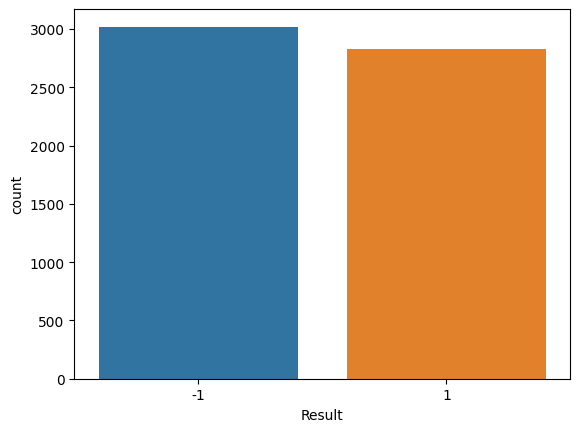

In [13]:
# Ex2c: Use a statistical graph to visualise the data above -- answer
sns.countplot(x=df["Result"])
plt.show()

### Exerise 3: Identify the features and label

In [14]:
# Ex3a: Define x-axis -- answer
x = df.drop(["Result"],axis=1) #axis = 0 (drop by index), axis = 1

In [15]:
x

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
index,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
5,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11038,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1
11046,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,0,-1,1,0,1
11049,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,0,-1,1,0,1


In [16]:
# Ex3b: Define y-axis -- answer
y = df["Result"]
y

index
1       -1
2       -1
3       -1
4       -1
5        1
        ..
11038   -1
11046    1
11049    1
11050   -1
11055   -1
Name: Result, Length: 5849, dtype: int64

### Exercise 4: Choose and train the model
We will be using KNearestNeighbour for this exercise

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [18]:
# Ex4a: spilt the data -- answer
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.2, stratify=y)

In [19]:
# Ex4b: train the model -- answer
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
# predict with the model
pred=model.predict(x_test)
pred

array([-1,  1, -1, ..., -1, -1, -1])

In [21]:
# Ex4c: display the model score -- answer
model.score(x_test,y_test)

0.9085470085470085

In [22]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})
result

,Actual_Value,Predict_Value
index,,
265,-1,-1
9998,1,1
6568,1,-1
746,1,1
501,1,1
...,...,...
9602,1,1
1738,1,1
8514,-1,-1


### Exercise 5: Evaluate the model and display the reports




In [40]:
# Ex5a: Evaluate the model using the training data -- answer
pred = model.predict(x_train)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [42]:
# Ex5b: Display classification report -- answer
print('Classification Report: \n',classification_report(y_train ,pred ))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.94      0.96      0.95      2415
           1       0.96      0.94      0.95      2264

    accuracy                           0.95      4679
   macro avg       0.95      0.95      0.95      4679
weighted avg       0.95      0.95      0.95      4679



In [43]:
# Ex5c: Display Confusion Matrix and accuracy -- answer
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

Confusion Matrix: 
 [[2315  100]
 [ 136 2128]]

Accuracy:  0.9495618721949134


Confusion Matrix for training data


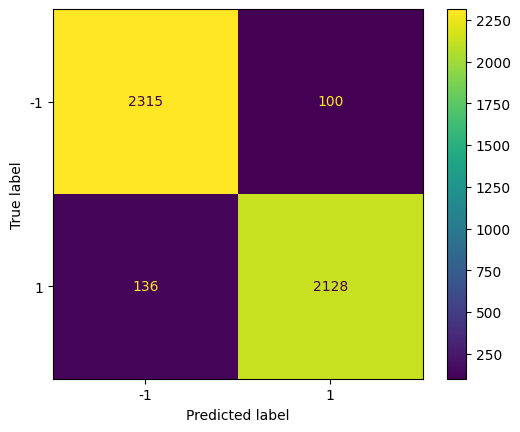

In [45]:
# Ex5c (optional): Plot the Confusion Matrix for easy visualisation -- answer
  #old way from sklearn.metrics import plot_confusion_matrix

#new library and approach
from sklearn.metrics import ConfusionMatrixDisplay

print("Confusion Matrix for training data")
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

plt.show()

              precision    recall  f1-score   support

          -1       0.90      0.93      0.91       604
           1       0.92      0.89      0.90       566

    accuracy                           0.91      1170
   macro avg       0.91      0.91      0.91      1170
weighted avg       0.91      0.91      0.91      1170

Confusion Matrix: 
 [[559  45]
 [ 62 504]]

Accuracy:  0.9085470085470085

Confusion Matrix for testing data


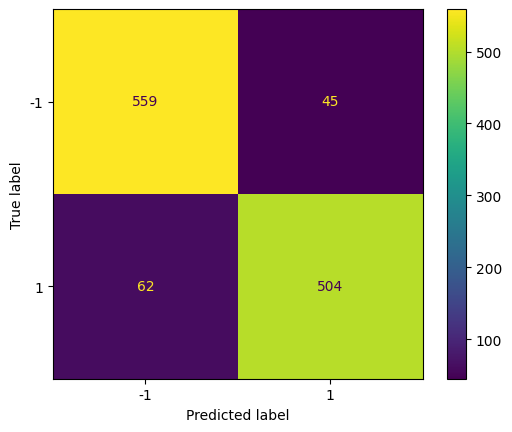

In [49]:
# Ex5d: repeat Ex5a-5c on testing data -- answer
pred2 = model.predict(x_test)
print(classification_report(y_test ,pred2))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred2))
print()
print("Confusion Matrix for testing data")
disp = ConfusionMatrixDisplay.from_predictions(y_test,pred2)
plt.show()